M22.CS 505 Advanced Programming CAT 2 on 24-07-2022 from 8:00am - 11:00am

 Amizuku Fancis

In [1]:
import numpy as np
import pandas as pd

In [16]:
df =pd.read_csv("Loan_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


 Clean the Data

In [17]:
df.drop("Unnamed: 0.1",axis=1, inplace=True)

In [18]:
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [19]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [22]:
df.head(15)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [21]:
df.shape

(346, 8)

Visualize the Data.

In [24]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [26]:
def scatter_view(x, y, z, azim, elev):
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)
    ax.scatter(x, y, z)
    ax.set_xlabel('Principal)', fontsize=16)
    ax.set_ylabel('terms)', fontsize=16)
    ax.set_zlabel('age)', fontsize=16)
    ax.azim = azim
    ax.elev = elev

In [28]:
xi = df['Principal']
yi = df['terms']
zi = df['age']
interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev),
         azim=(0, 90), elev=(0, 90))
plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

By using Euclidean Anomaly Detection

Calculate the means.

In [29]:
# Code Cell 7
mu = df.mean()

 Lets Calculate the Euclidean distance.

In [30]:
euclid_sq = np.square(df - mu).sum(axis=1)
euclid = np.sqrt(euclid_sq)

 Lets Create a histogram from the data.

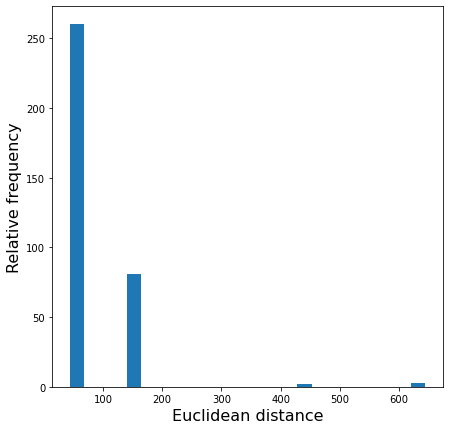

In [31]:
fig = plt.figure(figsize=(7, 7))
plt.hist(euclid, 25)

plt.xlabel('Euclidean distance', fontsize=16)
plt.ylabel('Relative frequency', fontsize=16)
plt.show()

Lets Compute the normalized distance.

In [32]:
max_euclid = euclid.max()
nmd_euclid = [float(x)/max_euclid for x in euclid]

Visualize it.

In [33]:
ecl_df = []
nmd_range = np.linspace(0, 1, 400)
for nmd_decision in nmd_range:
    num_fail = (nmd_euclid > nmd_decision).sum()
    ecl_df.append(float(num_fail) / len(euclid))

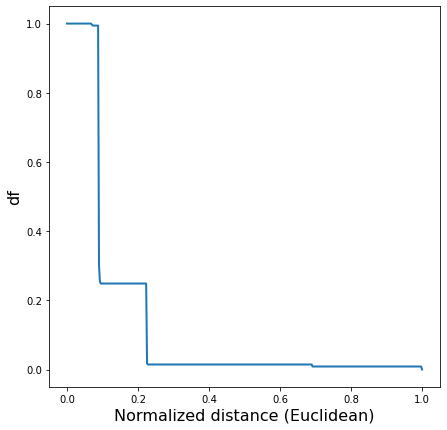

In [35]:
fig = plt.figure(figsize=(7, 7))
plt.plot(nmd_range, ecl_df, linewidth=2)
plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('df', fontsize=16)
plt.show()

Select the decision boundary.

In [36]:
threshold = 0.1
index, ecl_threshold = next(tpl for tpl in enumerate(ecl_df) if tpl[1] < threshold)
ecl_decision = nmd_range[index]

Generate the plot to mark the location of the decision boundary.

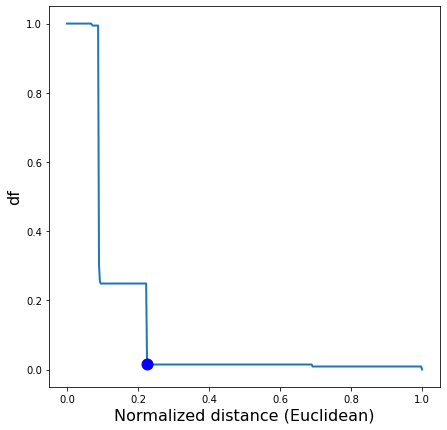

In [37]:
fig = plt.figure(figsize=(7, 7))
plt.plot(nmd_range, ecl_df, linewidth=2)
plt.plot(ecl_decision, ecl_threshold, 'bo', markersize=11)

plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('df', fontsize=16)
plt.show()

Lets Visualize the decision boundary in 3D.

In [38]:
radius = ecl_decision * max_euclid
phi = np.linspace(0, 2 * np.pi, 300)
theta = np.linspace(0, 2 * np.pi, 300)
xs = radius * np.outer(np.sin(theta), np.cos(phi))
ys = radius * np.outer(np.sin(theta), np.sin(phi))
zs = radius * np.outer(np.cos(theta), np.ones(np.size(phi)))

ecl_xd = xs + df['Principal'].mean()
ecl_yd = ys + df['terms'].mean()
ecl_zd = zs + df['age'].mean()

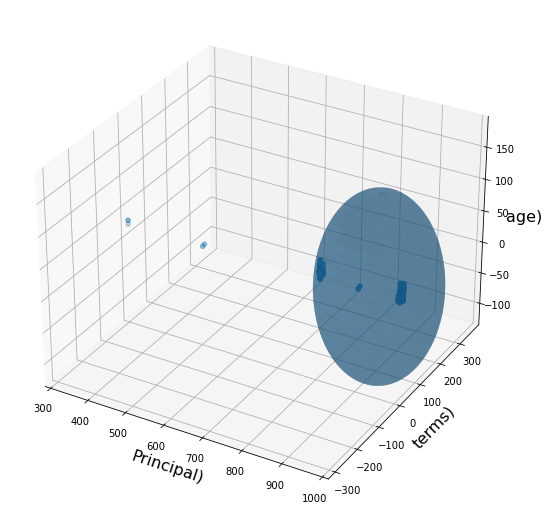

In [39]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

ax.scatter(df['Principal'],
           df['terms'], 
           df['age'])

ax.plot_surface(ecl_xd, ecl_yd, ecl_zd,
                linewidth=0, alpha=0.25)

ax.set_xlabel('Principal)', fontsize=16)
ax.set_ylabel('terms)', fontsize=16)
ax.set_zlabel('age)', fontsize=16)
    

extremes = []
extremes.append([df['Principal'].min(),
                 df['Principal'].max()])
extremes.append([df['terms'].min(),
                 df['terms'].max()])
extremes.append([df['age'].min(),
                 df['age'].max()])

hwidths = [(row[1] - row[0]) / 2.0 for row in extremes]
midpts = [(row[1] + row[0]) / 2.0 for row in extremes]

left_ends = midpts - np.max(hwidths)
right_ends = midpts + np.max(hwidths)
ax.set_xlim([left_ends[0], right_ends[0]]);
ax.set_ylim([left_ends[1], right_ends[1]]);
ax.set_ylim([left_ends[2], right_ends[2]]);

Deduce the Loan Anomaly Detection Algorithm based on this data set

Isolation Forest Anomaly Detection Algorithm is what i think is the algroithim since the anomalies lie away from the cluster of data points, so it's easier to isolate the anomalies compare to the regular data points.